In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import calendar

# Loading DataSets

In [2]:
sulfurDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/SulfurDiOxide_2019.csv")
sulfurDiOxide2020.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,1550.000000,1550.0,1550.000000,1550.000000,1550.0,1550.000000,1550.000000,1550.000000,0.0,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,0.0,1550.0,1550.000000
mean,774.500000,36.0,61.269677,555.710968,62201.0,1.176129,41.691970,-75.696012,NaN,23.392903,97.481290,69.007641,86.820645,8.509677,NaN,11.0,32458.580645
std,447.590773,0.0,41.335698,761.973384,0.0,0.381053,0.910629,2.148074,NaN,2.407987,10.012741,14.711030,12.802824,8.349273,NaN,0.0,7327.099610
min,0.000000,36.0,5.000000,3.000000,62201.0,1.000000,40.743160,-79.318810,NaN,3.000000,13.000000,19.375000,28.000000,0.000000,NaN,11.0,18500.000000
25%,387.250000,36.0,13.000000,5.000000,62201.0,1.000000,40.867900,-77.548170,NaN,24.000000,100.000000,59.145833,83.000000,2.000000,NaN,11.0,27460.000000
50%,774.500000,36.0,59.000000,133.000000,62201.0,1.000000,41.051920,-73.878090,NaN,24.000000,100.000000,70.708333,92.000000,5.000000,NaN,11.0,35620.000000
75%,1161.750000,36.0,101.000000,1007.000000,62201.0,1.000000,42.499630,-73.763660,NaN,24.000000,100.000000,80.322917,95.000000,18.000000,NaN,11.0,35620.000000
max,1549.000000,36.0,119.000000,2004.000000,62201.0,2.000000,43.146180,-73.585490,NaN,24.000000,100.000000,98.875000,99.000000,23.000000,NaN,11.0,40380.000000


In [3]:
ozoneData2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Ozone_2019.csv")
ozoneData2020.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,39721.000000,39721.0,39721.000000,39721.000000,39721.0,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,29779.000000,39721.000000,34292.000000
mean,19860.000000,36.0,63.287757,1180.316508,44201.0,1.093704,42.243807,-75.009351,21.788525,97.967725,0.030081,0.039091,10.924775,35.903220,82.630523,32264.406859
std,11466.609358,0.0,35.342500,2691.056539,0.0,0.390123,1.218591,1.834932,3.397676,7.696605,0.009155,0.010456,5.138057,11.651047,12.477607,10184.493546
min,0.000000,36.0,1.000000,2.000000,44201.0,1.000000,40.580270,-79.318810,1.000000,4.000000,0.000824,0.003000,0.000000,3.000000,47.000000,10580.000000
25%,9930.000000,36.0,31.000000,4.000000,44201.0,1.000000,40.960780,-76.463240,17.000000,100.000000,0.023542,0.032000,9.000000,29.000000,87.000000,27460.000000
50%,19860.000000,36.0,67.000000,9.000000,44201.0,1.000000,42.400600,-74.028190,24.000000,100.000000,0.030118,0.038000,11.000000,35.000000,87.000000,35620.000000
75%,29790.000000,36.0,101.000000,1006.000000,44201.0,1.000000,43.223860,-73.757330,24.000000,100.000000,0.036667,0.046000,13.000000,42.000000,87.000000,35620.000000
max,39720.000000,36.0,119.000000,9991.000000,44201.0,3.000000,44.393080,-72.712380,24.000000,100.000000,0.064333,0.118000,23.000000,150.000000,87.000000,48060.000000


In [4]:
NitrogenDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/NitrogenDiOxide_2019.csv")
NitrogenDiOxide2020.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,5412.000000,5412.0,5412.000000,5412.000000,5412.0,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000
mean,2705.500000,36.0,46.410200,74.193644,42602.0,1.246859,41.661691,-75.558180,23.097191,96.251293,11.684832,23.028936,11.446046,21.283075,203.883592,31060.162602
std,1562.454159,0.0,33.420395,52.817265,0.0,0.657920,1.063890,2.286769,2.489485,10.367006,7.181306,12.455802,8.112921,11.786074,175.782506,9352.997931
min,0.000000,36.0,5.000000,5.000000,42602.0,1.000000,40.736140,-78.809526,3.000000,13.000000,0.689474,1.100000,0.000000,1.000000,74.000000,15380.000000
25%,1352.750000,36.0,5.000000,15.000000,42602.0,1.000000,40.739264,-78.765825,24.000000,100.000000,6.408333,13.000000,5.000000,12.000000,74.000000,15380.000000
50%,2705.500000,36.0,29.000000,110.000000,42602.0,1.000000,40.867900,-73.902000,24.000000,100.000000,10.092654,21.100000,8.000000,20.000000,99.000000,35620.000000
75%,4058.250000,36.0,81.000000,125.000000,42602.0,1.000000,42.921107,-73.821530,24.000000,100.000000,15.445833,31.400000,20.000000,29.000000,212.000000,35620.000000
max,5411.000000,36.0,103.000000,133.000000,42602.0,3.000000,43.145013,-73.139046,24.000000,100.000000,48.200000,67.200000,23.000000,65.000000,574.000000,40380.000000


In [5]:
carbonMonoOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/CarbonMonoOxide_2019.csv")
carbonMonoOxide2020.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,7205.000000,7205.0,7205.000000,7205.000000,7205.0,7205.0,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,3603.000000,7205.000000,7205.000000
mean,3602.000000,36.0,49.900208,158.033449,42101.0,1.0,41.998873,-75.922121,23.342540,97.286051,0.243779,0.350589,8.485496,3.426034,530.324774,28317.498959
std,2080.048677,0.0,31.593065,287.927349,0.0,0.0,1.028560,2.123501,2.222138,9.228028,0.084768,0.181306,8.321798,1.785020,167.763177,11148.629006
min,0.000000,36.0,1.000000,3.000000,42101.0,1.0,40.736140,-78.809526,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,54.000000,10580.000000
25%,1801.000000,36.0,29.000000,12.000000,42101.0,1.0,40.819760,-77.557280,24.000000,100.000000,0.200000,0.213000,0.000000,2.000000,593.000000,15380.000000
50%,3602.000000,36.0,55.000000,124.000000,42101.0,1.0,42.091420,-77.209780,24.000000,100.000000,0.226087,0.300000,6.000000,3.000000,593.000000,35620.000000
75%,5403.000000,36.0,81.000000,133.000000,42101.0,1.0,42.921107,-73.821530,24.000000,100.000000,0.280583,0.400000,17.000000,5.000000,593.000000,35620.000000
max,7204.000000,36.0,101.000000,1007.000000,42101.0,1.0,43.146180,-73.757330,24.000000,100.000000,1.004125,2.857000,23.000000,17.000000,593.000000,40380.000000


In [6]:


TemperatureDf=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Temperature_2019.csv")
TemperatureDf.describe()


,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,3117.000000,3117.0,3117.000000,3117.000000,3117.0,3117.0,3117.000000,3117.000000,0.0,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,0.0,3117.0,2813.000000
mean,1558.000000,36.0,62.553417,834.453321,62101.0,1.0,41.789968,-75.180384,NaN,23.942573,99.763555,50.324919,58.784087,12.538017,NaN,40.0,33667.522218
std,899.944721,0.0,33.687200,1504.509175,0.0,0.0,0.956640,1.942322,NaN,0.731801,3.036932,19.524877,20.758280,4.497494,NaN,0.0,6326.437901
min,0.000000,36.0,5.000000,3.000000,62101.0,1.0,40.736140,-79.318810,NaN,3.000000,13.000000,-8.583333,-3.000000,0.000000,NaN,40.0,18500.000000
25%,779.000000,36.0,41.000000,5.000000,62101.0,1.0,40.867900,-77.209780,NaN,24.000000,100.000000,34.125000,41.000000,12.000000,NaN,40.0,35620.000000
50%,1558.000000,36.0,67.000000,124.000000,62101.0,1.0,41.523750,-74.215340,NaN,24.000000,100.000000,52.875000,62.000000,13.000000,NaN,40.0,35620.000000
75%,2337.000000,36.0,81.000000,1007.000000,62101.0,1.0,42.499630,-73.763660,NaN,24.000000,100.000000,67.583333,77.000000,15.000000,NaN,40.0,35620.000000
max,3116.000000,36.0,119.000000,5001.000000,62101.0,1.0,43.449570,-73.585490,NaN,24.000000,100.000000,90.958333,99.000000,23.000000,NaN,40.0,45060.000000


In [7]:

HumidityDf=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Relative_Humidity-2019.csv")
HumidityDf.describe()


,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,1550.000000,1550.0,1550.000000,1550.000000,1550.0,1550.000000,1550.000000,1550.000000,0.0,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,0.0,1550.0,1550.000000
mean,774.500000,36.0,61.269677,555.710968,62201.0,1.176129,41.691970,-75.696012,NaN,23.392903,97.481290,69.007641,86.820645,8.509677,NaN,11.0,32458.580645
std,447.590773,0.0,41.335698,761.973384,0.0,0.381053,0.910629,2.148074,NaN,2.407987,10.012741,14.711030,12.802824,8.349273,NaN,0.0,7327.099610
min,0.000000,36.0,5.000000,3.000000,62201.0,1.000000,40.743160,-79.318810,NaN,3.000000,13.000000,19.375000,28.000000,0.000000,NaN,11.0,18500.000000
25%,387.250000,36.0,13.000000,5.000000,62201.0,1.000000,40.867900,-77.548170,NaN,24.000000,100.000000,59.145833,83.000000,2.000000,NaN,11.0,27460.000000
50%,774.500000,36.0,59.000000,133.000000,62201.0,1.000000,41.051920,-73.878090,NaN,24.000000,100.000000,70.708333,92.000000,5.000000,NaN,11.0,35620.000000
75%,1161.750000,36.0,101.000000,1007.000000,62201.0,1.000000,42.499630,-73.763660,NaN,24.000000,100.000000,80.322917,95.000000,18.000000,NaN,11.0,35620.000000
max,1549.000000,36.0,119.000000,2004.000000,62201.0,2.000000,43.146180,-73.585490,NaN,24.000000,100.000000,98.875000,99.000000,23.000000,NaN,11.0,40380.000000


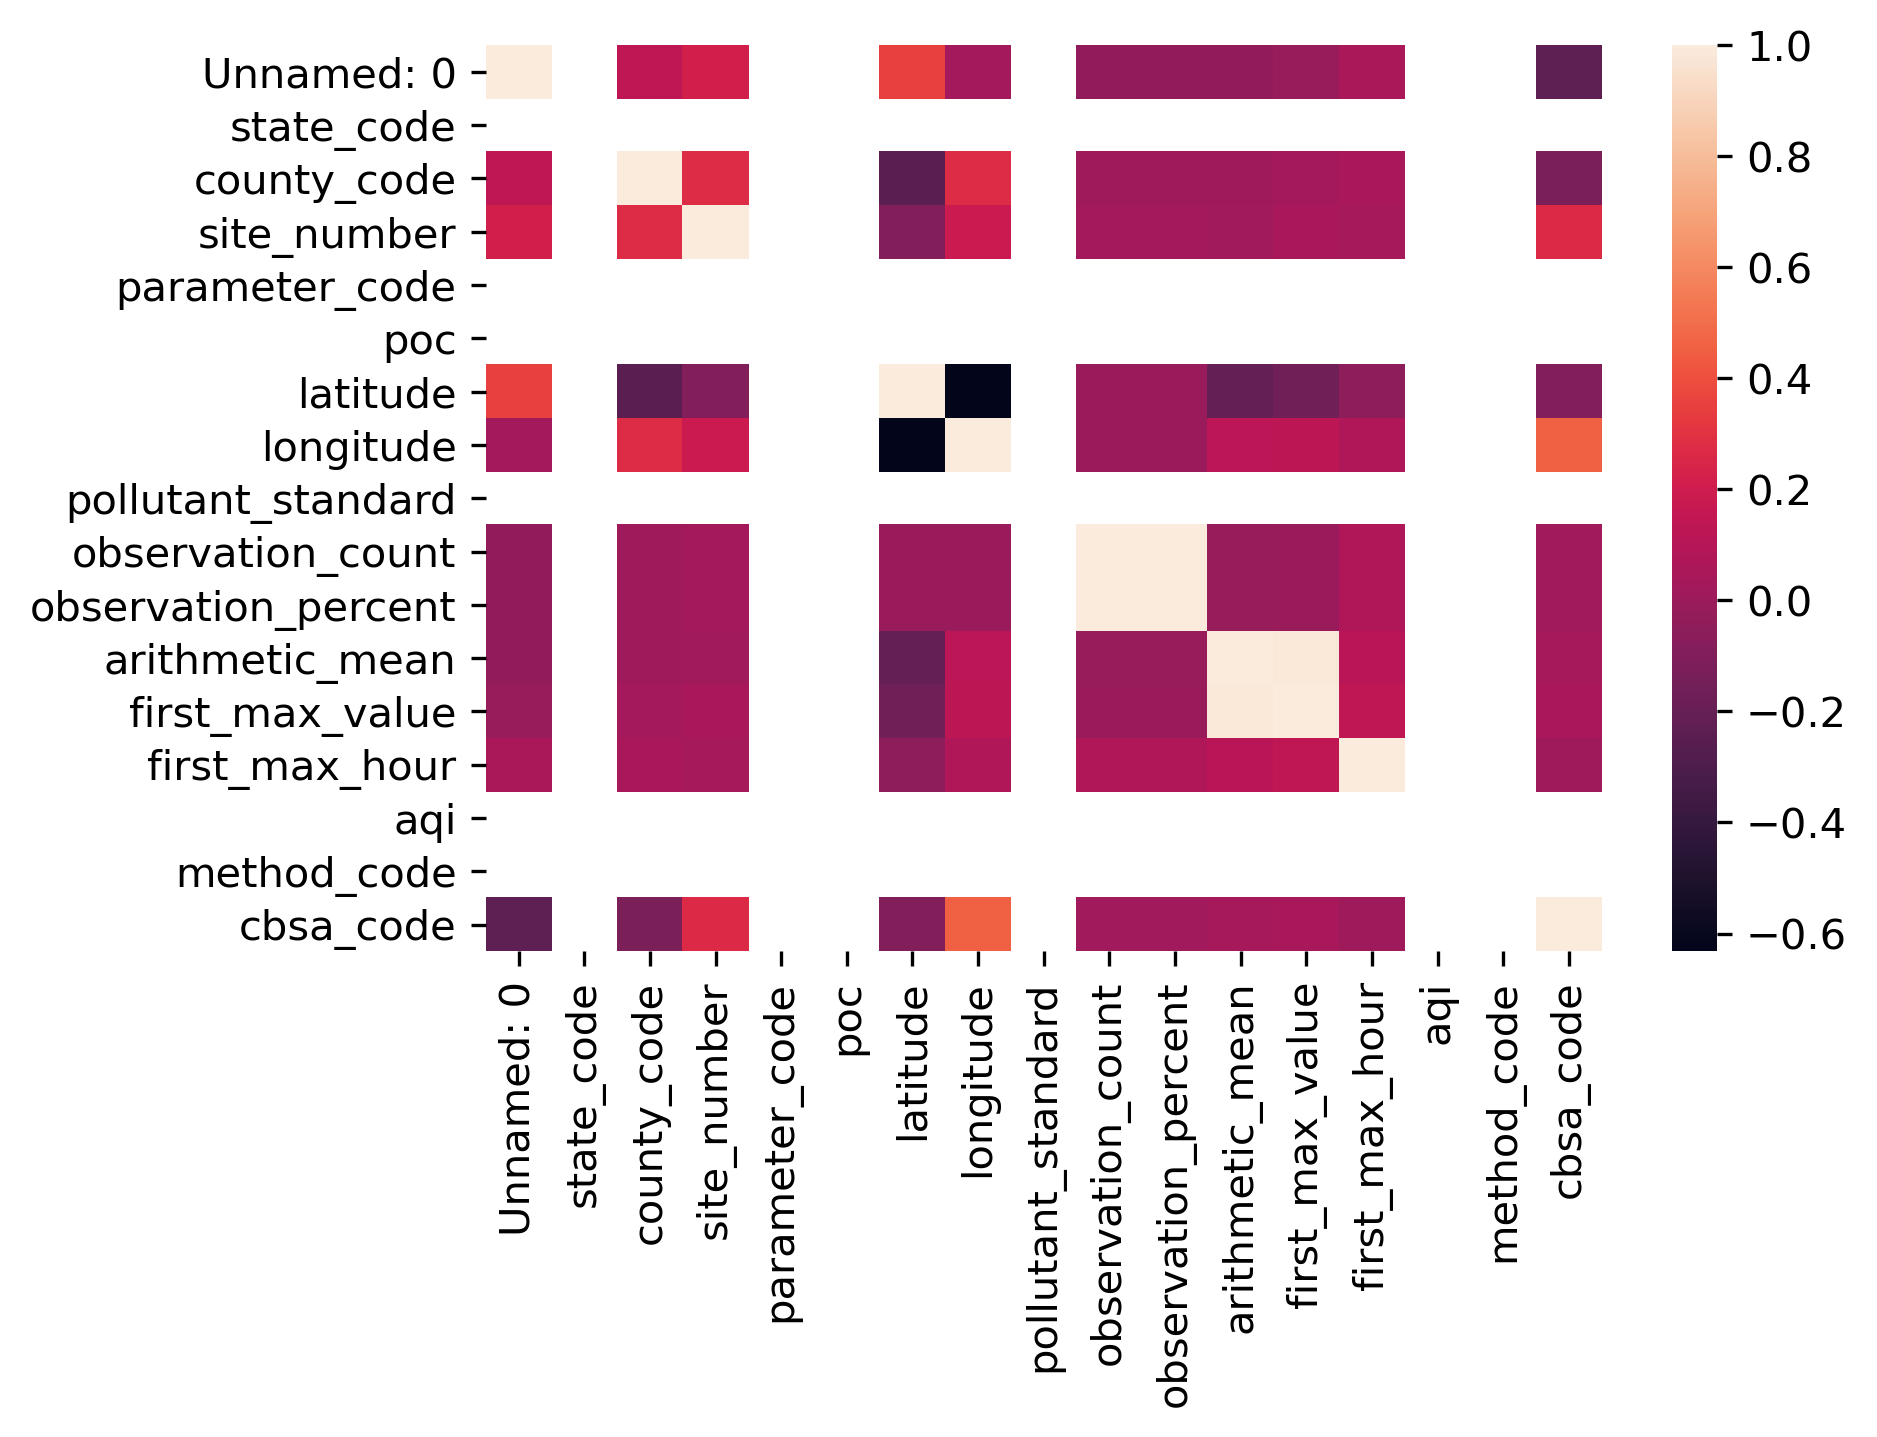

In [25]:

corr=TemperatureDf.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

# 1.Removing Columns

In [22]:



def removeColumns(dataFrame):
    return dataFrame[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','county','state']].copy() 



#sulfur
sulfurDiOxide2020New=removeColumns(sulfurDiOxide2020)
print("Sulfur Shape : " + str(sulfurDiOxide2020New.shape))

#Ozone
ozoneData2020New=removeColumns(ozoneData2020)
print("Ozone Shape : " + str(ozoneData2020New.shape))

#Nitrogen
NitrogenDiOxide2020New=removeColumns(NitrogenDiOxide2020)
print("NitrogenDiOxide Shape : " + str(NitrogenDiOxide2020New.shape))

#CarbonMonoOxide
carbonMonoOxide2020New=removeColumns(carbonMonoOxide2020)
print("CarbonMonoOxide Shape : " + str(carbonMonoOxide2020New.shape))

#Temperature
TemperatureDfNew=removeColumns(TemperatureDf)
print("Temperature Shape : " + str(TemperatureDfNew.shape))

#Humidity
HumidityDfNew=removeColumns(HumidityDf)
print("Relative Humidity Shape : "+ str(HumidityDfNew.shape))    


Sulfur Shape : (39137, 12)
Ozone Shape : (39721, 12)
NitrogenDiOxide Shape : (5412, 12)
CarbonMonoOxide Shape : (7205, 12)
Temperature Shape : (3117, 12)
Relative Humidity Shape : (1550, 12)


# 2. Removing Rows

In [23]:


def rowRemovalUsingPollutantStandard(dataFrame,pollutantStandard):
    return dataFrame[dataFrame['pollutant_standard'] == pollutantStandard]

def rowRemovalUsingValidityIndicator(dataFrame):
    return dataFrame[dataFrame['validity_indicator'] == "Y"] 
    



#removing rows using pollutant_standard used to measure 

sulfurDiOxide2020New = rowRemovalUsingPollutantStandard(sulfurDiOxide2020New,"SO2 1-hour 2010")

ozoneData2020New =rowRemovalUsingPollutantStandard(ozoneData2020New,"Ozone 8-hour 2015")

NitrogenDiOxide2020New = rowRemovalUsingPollutantStandard(NitrogenDiOxide2020New,"NO2 1-hour") 

carbonMonoOxide2020New = rowRemovalUsingPollutantStandard(carbonMonoOxide2020New,"CO 8-hour 1971") 


#removing Rows using validity_indicator

sulfurDiOxide2020New = rowRemovalUsingValidityIndicator(sulfurDiOxide2020New)

ozoneData2020New = rowRemovalUsingValidityIndicator(ozoneData2020New)

NitrogenDiOxide2020New = rowRemovalUsingValidityIndicator(NitrogenDiOxide2020New) 

carbonMonoOxide2020New = rowRemovalUsingValidityIndicator(carbonMonoOxide2020New)

TemperatureDfNew = rowRemovalUsingValidityIndicator(TemperatureDfNew) 

HumidityDfNew = rowRemovalUsingValidityIndicator(HumidityDfNew)

print("Sulfur Shape : " + str(sulfurDiOxide2020New.shape)) 
print("Ozone Shape : " + str(ozoneData2020New.shape))
print("NitrogenDiOxide Shape : " + str(NitrogenDiOxide2020New.shape))
print("CarbonMonoOxide Shape : " + str(carbonMonoOxide2020New.shape))
print("Temperature Shape : " + str(TemperatureDfNew.shape))
print("Relative Humidity Shape : "+ str(HumidityDfNew.shape))

Sulfur Shape : (7783, 12)
Ozone Shape : (9671, 12)
NitrogenDiOxide Shape : (2626, 12)
CarbonMonoOxide Shape : (3603, 12)
Temperature Shape : (3108, 12)
Relative Humidity Shape : (1486, 12)


# 3. Duplicate Check

In [24]:
def duplicateCheck(dataFrame,DataSetName):
    duplicate = dataFrame[dataFrame.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    if duplicate.empty:
        print(DataSetName + " has no duplicate Values.")


duplicateCheck(sulfurDiOxide2020New, "SulfurDiOxide Data Set")        
duplicateCheck(ozoneData2020New, "OzoneDataSet Data Set")        
duplicateCheck(NitrogenDiOxide2020New, "NitrogenDiOxide Data Set")        
duplicateCheck(carbonMonoOxide2020New, "CarobonMonoOxide Data Set")        
duplicateCheck(TemperatureDfNew, "Temperature Data Set")        
duplicateCheck(HumidityDfNew, "Relative Humidity Data Set")        



    

SulfurDiOxide Data Set has no duplicate Values.
OzoneDataSet Data Set has no duplicate Values.
NitrogenDiOxide Data Set has no duplicate Values.
CarobonMonoOxide Data Set has no duplicate Values.
Temperature Data Set has no duplicate Values.
Relative Humidity Data Set has no duplicate Values.


# 4. Parsing Dates

In [55]:
#converting the date_local column which stores the dates on which readings were taken to dateTime64 type

def parseDates(dataFrame):
    dataFrame['date_local']=pd.to_datetime(dataFrame['date_local'])
    return dataFrame


sulfurDiOxide2020New=parseDates(sulfurDiOxide2020New)
ozoneData2020New=parseDates(ozoneData2020New)
NitrogenDiOxide2020New=parseDates(NitrogenDiOxide2020New)
carbonMonoOxide2020New=parseDates(carbonMonoOxide2020New)
TemperatureDfNew=parseDates(TemperatureDfNew)
HumidityDfNew=parseDates(HumidityDfNew)


# 5. Removing Outliers

In [27]:
def checkAndRemoveOutliers(dataFrame,columnName):
    med=np.median(dataFrame[columnName])
    ma = stats.median_abs_deviation(dataFrame[columnName])
    mad=np.median(ma)
    dataFrame = dataFrame.query("(((0.6745*({0}-@med))/@mad)<3) & (((0.6745*({0}-@med))/@mad)>-3)".format(columnName))
    return dataFrame
    


sulfurDiOxide2020New=checkAndRemoveOutliers(sulfurDiOxide2020New,'arithmetic_mean')
sulfurDiOxide2020New=checkAndRemoveOutliers(sulfurDiOxide2020New,'first_max_value')


ozoneData2020New=checkAndRemoveOutliers(ozoneData2020New,'arithmetic_mean')
ozoneData2020New=checkAndRemoveOutliers(ozoneData2020New,'first_max_value')

carbonMonoOxide2020New=checkAndRemoveOutliers(carbonMonoOxide2020New,'arithmetic_mean')
carbonMonoOxide2020New=checkAndRemoveOutliers(carbonMonoOxide2020New,'first_max_value')

NitrogenDiOxide2020New=checkAndRemoveOutliers(NitrogenDiOxide2020New,'arithmetic_mean')
NitrogenDiOxide2020New=checkAndRemoveOutliers(NitrogenDiOxide2020New,'first_max_value')

TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'arithmetic_mean')
TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'first_max_value')

TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'arithmetic_mean')
TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'first_max_value')
 


print("Sulfur Shape : " + str(sulfurDiOxide2020New.shape)) 
print("Ozone Shape : " + str(ozoneData2020New.shape))
print("NitrogenDiOxide Shape : " + str(NitrogenDiOxide2020New.shape))
print("CarbonMonoOxide Shape : " + str(carbonMonoOxide2020New.shape))
print("Temperature Shape : " + str(TemperatureDfNew.shape))
print("Relative Humidity Shape : "+ str(HumidityDfNew.shape))

Sulfur Shape : (6404, 12)
Ozone Shape : (9615, 12)
NitrogenDiOxide Shape : (2550, 12)
CarbonMonoOxide Shape : (3363, 12)
Temperature Shape : (3108, 12)
Relative Humidity Shape : (1486, 12)


# 6. Normalize

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


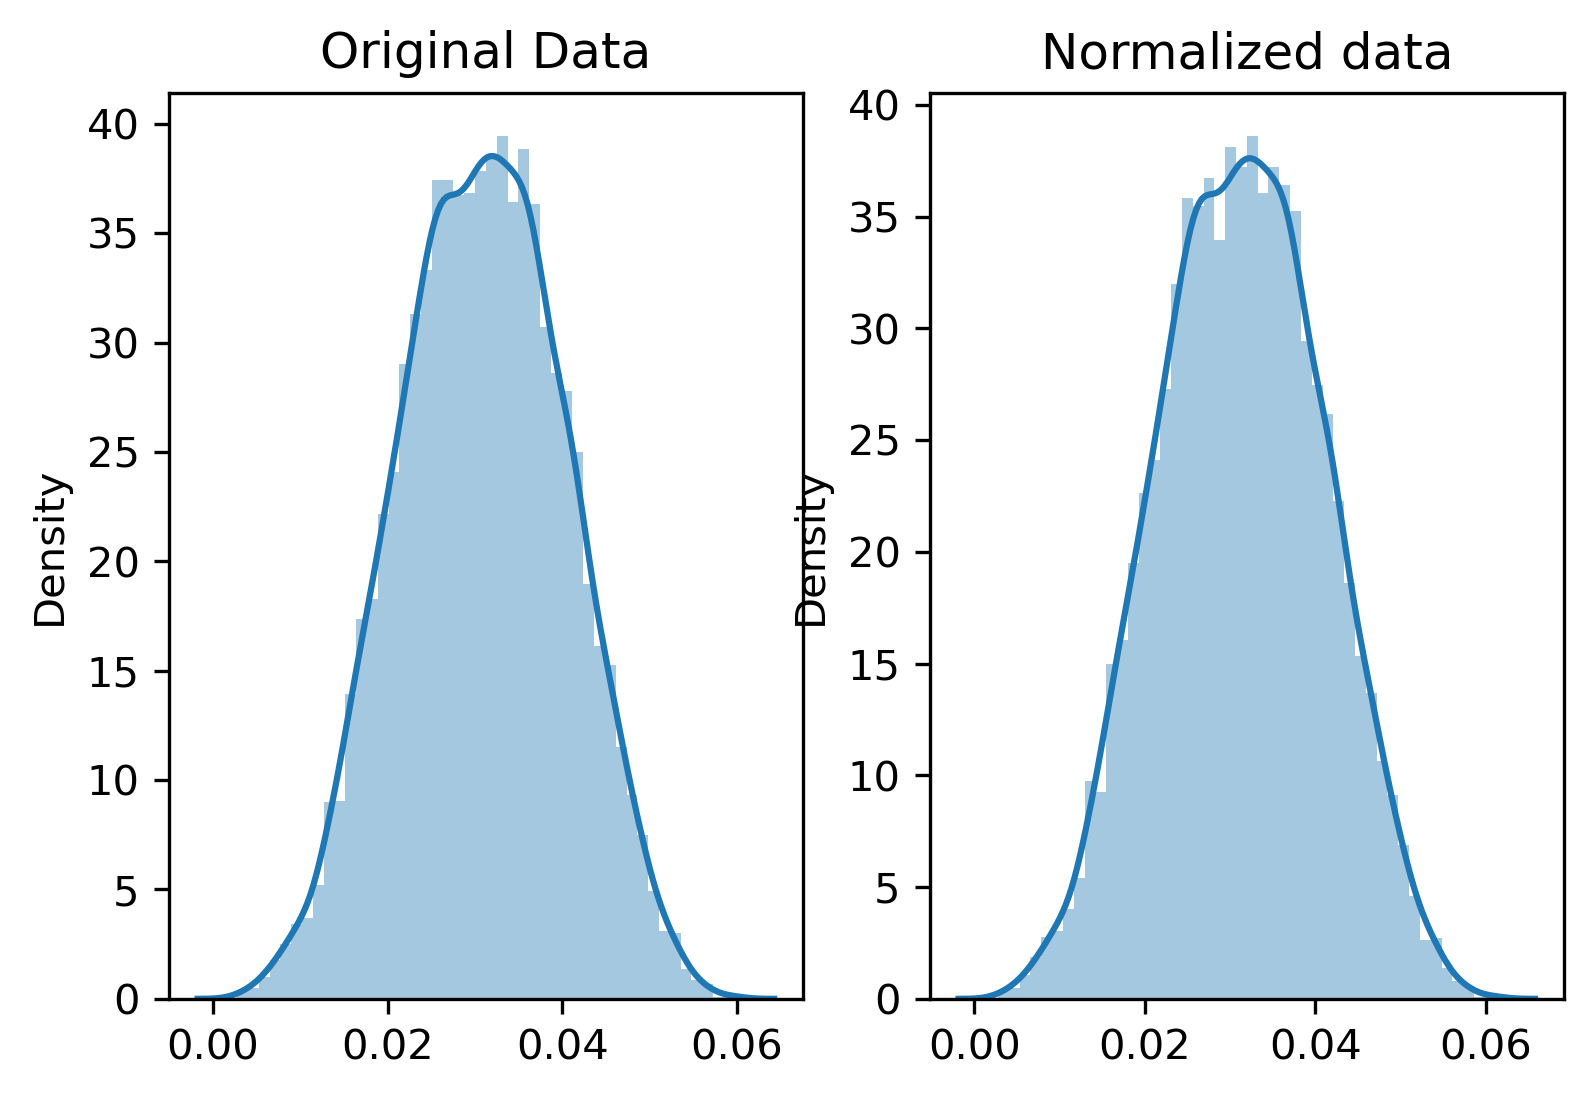

In [31]:
def normalizeDataAndPlot(dataFrame, columnName,dataSetName,showPlot):
    normalized_data = stats.yeojohnson(dataFrame[columnName])
    if(showPlot):
        fig, ax=plt.subplots(1,2)
        sns.distplot(dataFrame[columnName].to_numpy(), ax=ax[0])
        ax[0].set_title("Original Data")
        sns.distplot(normalized_data[0], ax=ax[1])
        ax[1].set_title("Normalized data")
    dataFrame[columnName]=normalized_data[0]                   
    return dataFrame


sulfurDiOxide2020New=normalizeDataAndPlot(sulfurDiOxide2020New,'arithmetic_mean', "SulfurDiOxide Data Set", False)
sulfurDiOxide2020New=normalizeDataAndPlot(sulfurDiOxide2020New,'first_max_value',"SulfurDiOxide Data Set", False)


ozoneData2020New=normalizeDataAndPlot(ozoneData2020New,'arithmetic_mean',"Ozone Data Set", True)
ozoneData2020New=normalizeDataAndPlot(ozoneData2020New,'first_max_value',"Ozone Data Set", False)

carbonMonoOxide2020New=normalizeDataAndPlot(carbonMonoOxide2020New,'arithmetic_mean',"CarobonMonoOxide Data Set", False)
carbonMonoOxide2020New=normalizeDataAndPlot(carbonMonoOxide2020New,'first_max_value',"CarobonMonoOxide Data Set", False)

NitrogenDiOxide2020New=normalizeDataAndPlot(NitrogenDiOxide2020New,'arithmetic_mean',"NitrogenDiOxide Data Set", False)
NitrogenDiOxide2020New=normalizeDataAndPlot(NitrogenDiOxide2020New,'first_max_value',"NitrogenDiOxide Data Set", False)

TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'arithmetic_mean',"Temperature Data Set", False)
TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'first_max_value',"Temperature Data Set", False)

TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'arithmetic_mean',"Relative Humidity Data Set", False)
TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'first_max_value',"Relative Humidity Data Set", False)

# 7. Check For NULL Values

In [51]:
def checkNULLValues(dataFrame,dataSetName):
    missingValues=dataFrame.isnull().sum()
    count=0
    nullCount=0
    for i in missingValues:
        count+=1
        if(i>0):
            nullCount+=i
            print( dataFrame.columns[count-1],i)
            
    if(nullCount>0):
        print(dataSetName + " has the above null values")
    else:
        print(dataSetName + " has no null values")
        
    print()    
    return


checkNULLValues(sulfurDiOxide2020New,"SulfurDiOxide")
checkNULLValues(ozoneData2020New,"Ozone")
checkNULLValues(NitrogenDiOxide2020New,"NitrogenDiOxide")
checkNULLValues(carbonMonoOxide2020New,"CarbonMonoOxide")
checkNULLValues(HumidityDfNew,"Relative Humdity")
checkNULLValues(TemperatureDfNew,"Temperature")       



SulfurDiOxide has no null values

Ozone has no null values

NitrogenDiOxide has no null values

CarbonMonoOxide has no null values

pollutant_standard 1486
aqi 1486
Relative Humdity has the above null values

pollutant_standard 3108
aqi 3108
Temperature has the above null values



# 8. Filling Null Values

In [57]:
#Since Temperature and humidity are not really pollutants there is not standards defined for them. Filling 
#the pollution_standard column with a default value as we don't think it will have an effect on our model later.

TemperatureDfNew['pollutant_standard']='Temperature Pollution Standard'
HumidityDfNew['pollutant_standard']='Relative Humidity Pollution Standard'

#Filling the aqi column with the largest aqi value recorded among the other pollutants in that particular county for 
#the particular Date.

#The AQI index of a particular region is calculated as the max AQI reported among the pollutants in that area.
#Reference : https://en.wikipedia.org/wiki/Air_quality_index 
#"If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location."

def fillNullAqiValues(dataFrame):
    for index,row in dataFrame.iterrows():
        oseries=ozoneData2020New[(ozoneData2020New['date_local'] == row['date_local']) & (ozoneData2020New['county']==row['county'])]['aqi']
        if(oseries.empty):
            oaqi=0
        else:
            oaqi= oseries.max()

        cseries=carbonMonoOxide2020New[(carbonMonoOxide2020New['date_local'] == row['date_local']) & (carbonMonoOxide2020New['county']==row['county'])]['aqi']
        if(cseries.empty):
            coaqi=0
        else:
            coaqi= cseries.max()

        noseries=NitrogenDiOxide2020New[(NitrogenDiOxide2020New['date_local'] == row['date_local']) & (NitrogenDiOxide2020New['county']==row['county'])]['aqi']
        if(noseries.empty):
            noaqi=0
        else:
            noaqi= noseries.max()

        soseries=sulfurDiOxide2020New[(sulfurDiOxide2020New['date_local'] == row['date_local']) & (sulfurDiOxide2020New['county']==row['county'])]['aqi']
        if(soseries.empty):
            soaqi=0
        else:
            soaqi= soseries.max()
        
        maxAqi=max(oaqi,coaqi,noaqi,soaqi) 
        dataFrame.at[index,'aqi']=maxAqi
    
    return dataFrame

TemperatureDfNew=fillNullAqiValues(TemperatureDfNew)
HumidityDfNew=fillNullAqiValues(HumidityDfNew)

#check for null values again

checkNULLValues(HumidityDfNew,"Relative Humdity")
checkNULLValues(TemperatureDfNew,"Temperature")    

Relative Humdity has no null values

Temperature has no null values



# 9. Merging Data Sets into One Data Set 

In [92]:
df=pd.concat([sulfurDiOxide2020New,ozoneData2020New,NitrogenDiOxide2020New,carbonMonoOxide2020New,HumidityDfNew, TemperatureDfNew], ignore_index=True)

print(df.shape)

df.describe()

(26526, 12)


,site_number,arithmetic_mean,first_max_value,aqi
count,26526.000000,26526.000000,26526.000000,26526.000000
mean,630.182462,11.805890,14.933690,20.602805
std,1792.588063,26.572961,32.586931,18.504957
min,2.000000,-7.610265,-2.773392,0.000000
25%,5.000000,0.031308,0.035301,0.000000
50%,12.000000,0.123872,0.170389,23.000000
75%,133.000000,2.598233,4.834172,36.000000
max,9991.000000,121.246590,139.702081,93.000000


# 10. Adding New Columns

In [93]:
#adding new columns which we will be using for EDA and as features in the next phases

# march-may -spring
# june-august- summer
# september to november -fall
# november to feb- winter

df['seasons']=""
df['dayofweekNo']=df['date_local'].dt.dayofweek
df['dayofWeek']=""

for index,row in df.iterrows():
    if(row['date_local'].month in [3,4,5]):
        df.at[index,'seasons']='Spring'
    elif(row['date_local'].month in [6,7,8]):
        df.at[index,'seasons']='Summer'
    elif(row['date_local'].month in [9,10,11]):
        df.at[index,'seasons']='Fall'
    elif(row['date_local'].month in [12,1,2]):
        df.at[index,'seasons']='Winter'
    
    df.at[index,'dayofWeek']=calendar.day_name[row['dayofweekNo']]
    


del df['dayofweekNo']
        
print(df.shape)
    

(26526, 14)


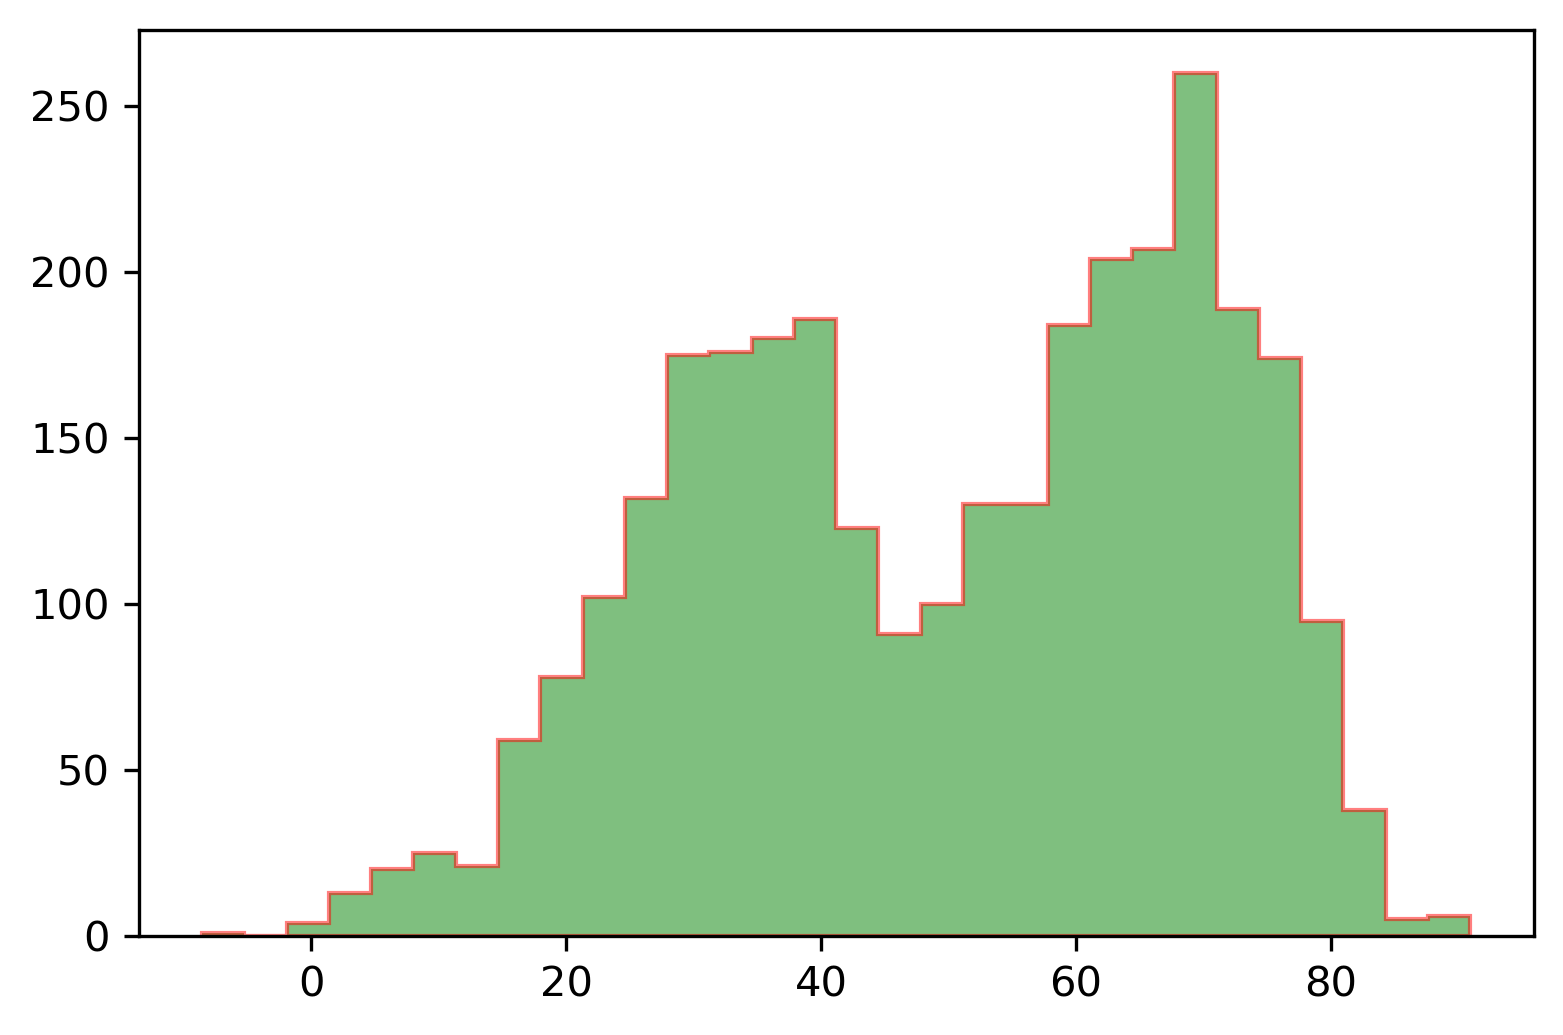

In [34]:
plt.hist(TemperatureDfNew['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

In [94]:
df.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/CleanedData.csv')

In [ ]:
#10 . Merging


In [ ]:
sns.pairplot(df, hue="species")